# Explore here

In [1]:
# Your code here
import pandas as pd


In [2]:
df = pd.read_csv('../data/raw/Lake_Bilancino.csv')

df

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31
...,...,...,...,...,...,...,...,...,...
6598,26/06/2020,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.60
6599,27/06/2020,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.60
6600,28/06/2020,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.60
6601,29/06/2020,0.0,0.0,0.0,0.0,0.0,23.20,250.82,0.60


In [4]:
df_2 = df[['Date','Lake_Level']]

df_2

,Date,Lake_Level
0,03/06/2002,249.43
1,04/06/2002,249.43
2,05/06/2002,249.43
3,06/06/2002,249.43
4,07/06/2002,249.44
...,...,...
6598,26/06/2020,250.85
6599,27/06/2020,250.84
6600,28/06/2020,250.83
6601,29/06/2020,250.82


In [5]:
df_2.index = df_2['Date']

df_2

,Date,Lake_Level
Date,,
03/06/2002,03/06/2002,249.43
04/06/2002,04/06/2002,249.43
05/06/2002,05/06/2002,249.43
06/06/2002,06/06/2002,249.43
07/06/2002,07/06/2002,249.44
...,...,...
26/06/2020,26/06/2020,250.85
27/06/2020,27/06/2020,250.84
28/06/2020,28/06/2020,250.83


In [7]:
df_2.drop('Date', axis=1, inplace=True)

df_2

C:\Users\felip\AppData\Local\Temp\ipykernel_4120\1964984335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop('Date', axis=1, inplace=True)


,Lake_Level
Date,
03/06/2002,249.43
04/06/2002,249.43
05/06/2002,249.43
06/06/2002,249.43
07/06/2002,249.44
...,...
26/06/2020,250.85
27/06/2020,250.84
28/06/2020,250.83


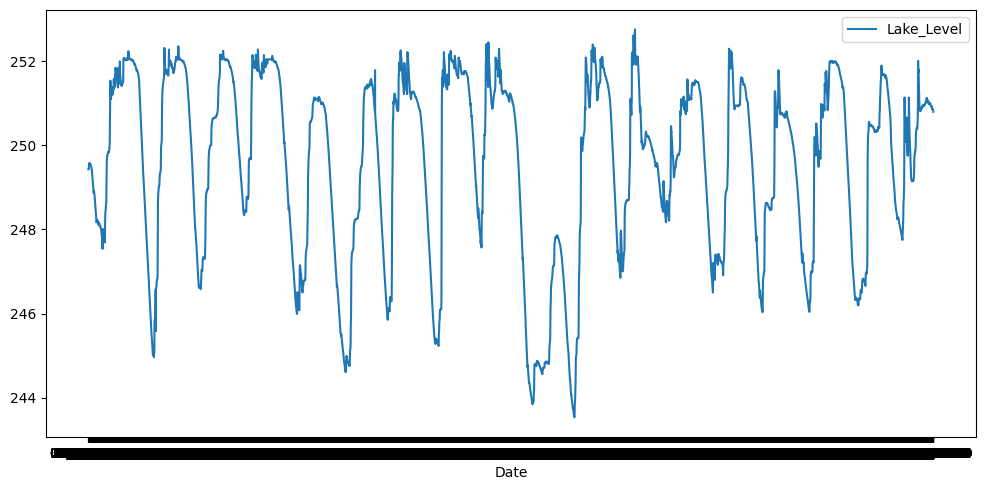

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize= (10,5))

sns.lineplot(data = df_2)

plt.tight_layout()
plt.show()

In [11]:
# Descomposición de la serie

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_2,period= 365)

decomposition

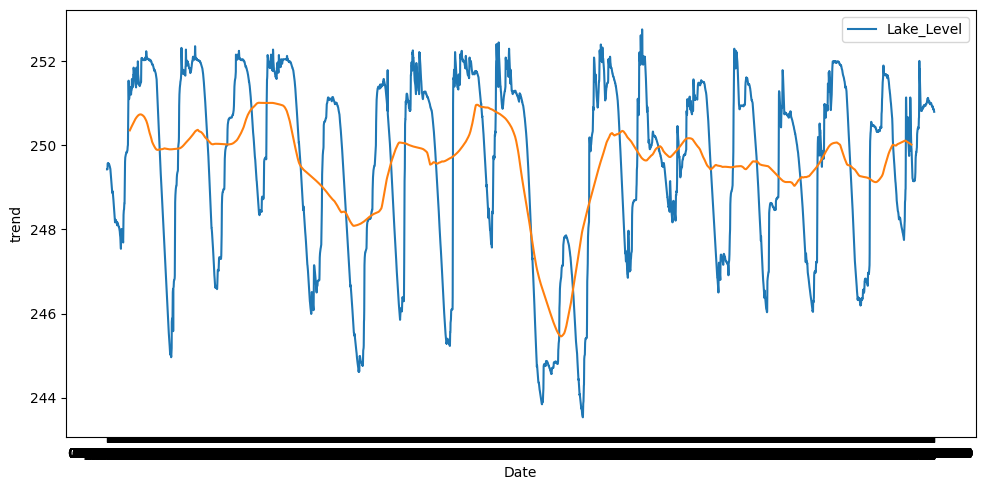

In [12]:
#identificar la tendencia

trend = decomposition.trend

fig, axis = plt.subplots(figsize=(10,5))

sns.lineplot(data= df_2)
sns.lineplot(data= trend)

plt.tight_layout()
plt.show()
             

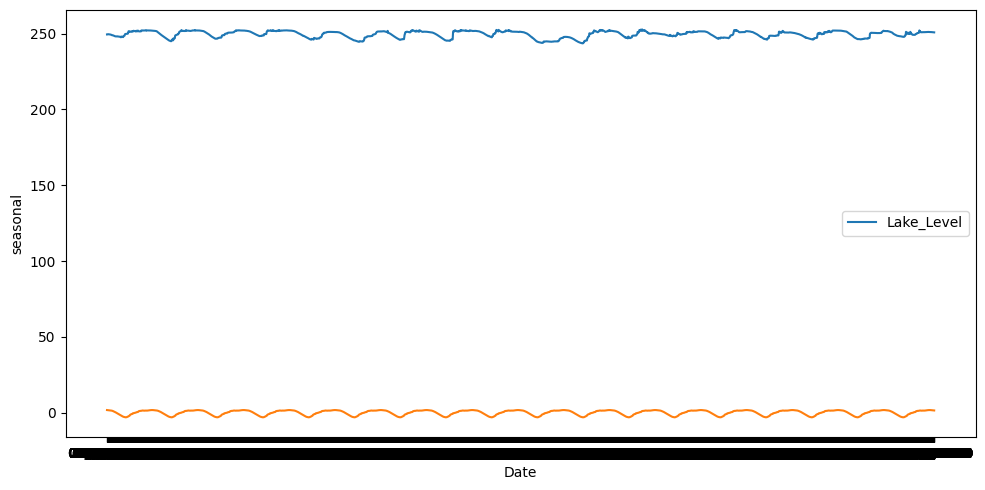

In [14]:
#Estacionalidad

seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10,5))

sns.lineplot(data=df_2)
sns.lineplot(data=seasonal)

plt.tight_layout()
plt.show()

Hay una alta estacionalidad, ya que son parecidos la estacioanalidad con el nivel del lago

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print('Resultados de la prueba de Dickey-Fuller')
    
    # Ejecutar la prueba ADF
    dftest = adfuller(timeseries, autolag='AIC')
    
    # Crear una Serie de pandas con los primeros 4 resultados
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    # Agregar valores críticos
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    
    return dfoutput

# Llamar a la función con la serie de tiempo (ejemplo con df_2)
resultado = test_stationarity(df_2)
print(resultado)


In [16]:

from statsmodels.tsa.stattools import adfuller

def test_stationarity (timeseries):
    print('Resultados de la prueba de Dickey-Fuller')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value','#Lags Used','Number of Observation Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

test_stationarity(df_2)

Resultados de la prueba de Dickey-Fuller


Test Statistic               -6.880991e+00
p-value                       1.433634e-09
#Lags Used                    3.500000e+01
Number of Observation Used    6.567000e+03
Critical Value (1%)          -3.431346e+00
Critical Value (5%)          -2.861980e+00
Critical Value (10%)         -2.567004e+00
dtype: float64

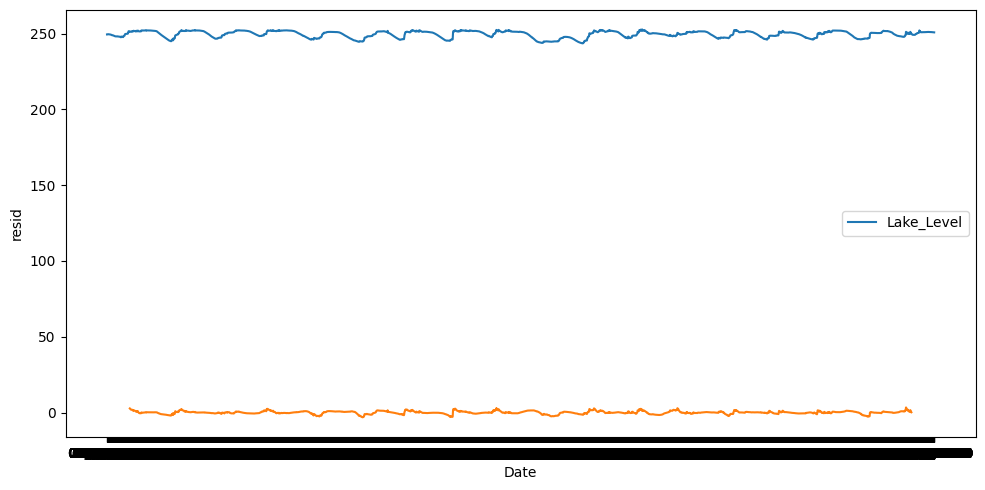

In [17]:
#Estudiar los residuos

residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10,5))

sns.lineplot(data=df_2)
sns.lineplot(data=residual)

plt.tight_layout()
plt.show()

Los residuos no son relevantes para hacer una prediccion (son muy pequeños)